In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
import os
import time

In [2]:
perf_results = [[4907, 4981, 4988],
                [6615, 6594, 6640],
                [126400, 127000, 126900],
                [4263, 4320, 4250],
                [ 687,  678,  681],
                [ 663,  665,  666]]

names = ["x86-64", "x86-64 unopt", "SPU", "GCC -O0", "GCC -O2", "GCC -O3"]

def make_table(results, unit):
    global names

    print("""
<table>
    <thead>
        <tr>
            <th rowspan=2>Компилятор</th>
            <th colspan=3 style="text-align: center">Быстродействие</th>
        </tr>
        <tr>
            <th style="text-align: center">""" + unit + """</th>
            <th style="text-align: center">% от первого</th>
            <th style="text-align: center">% от предыдущего</th>
        </tr>
    </thead>
    <tbody>""")

    for i in range(len(results)):
        print(" " * 8 + "<tr>")
        print(" " * 12 + "<td>" + names[i] + "</td>")

        print(" " * 12 + "<td style=\"text-align: center\">" + str(np.average(results[i]).round()) + " +- " + str(np.std(results[i]).round()) + "</td>")

        from_base = str(round(np.average(results[i]) / np.average(results[0]) * 100)) + "%"

        if i != 0:
            from_prev = str(round(np.average(results[i]) / np.average(results[i - 1]) * 100)) + "%"
        else:
            from_prev = ""

        print(" " * 12 + "<td style=\"text-align: center\">" + from_base + "</td>")
        print(" " * 12 + "<td style=\"text-align: center\">" + from_prev + "</td>")
        print(" " * 8 + "</tr>")

    print("""    </tbody>
</table>""")


In [3]:
make_table(perf_results, "1e6")


<table>
    <thead>
        <tr>
            <th rowspan=2>Компилятор</th>
            <th colspan=3 style="text-align: center">Быстродействие</th>
        </tr>
        <tr>
            <th style="text-align: center">1e6</th>
            <th style="text-align: center">% от первого</th>
            <th style="text-align: center">% от предыдущего</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>x86-64</td>
            <td style="text-align: center">4959.0 +- 37.0</td>
            <td style="text-align: center">100%</td>
            <td style="text-align: center"></td>
        </tr>
        <tr>
            <td>x86-64 unopt</td>
            <td style="text-align: center">6616.0 +- 19.0</td>
            <td style="text-align: center">133%</td>
            <td style="text-align: center">133%</td>
        </tr>
        <tr>
            <td>SPU</td>
            <td style="text-align: center">126767.0 +- 262.0</td>
            <td style="text-align: center">2556%</td>

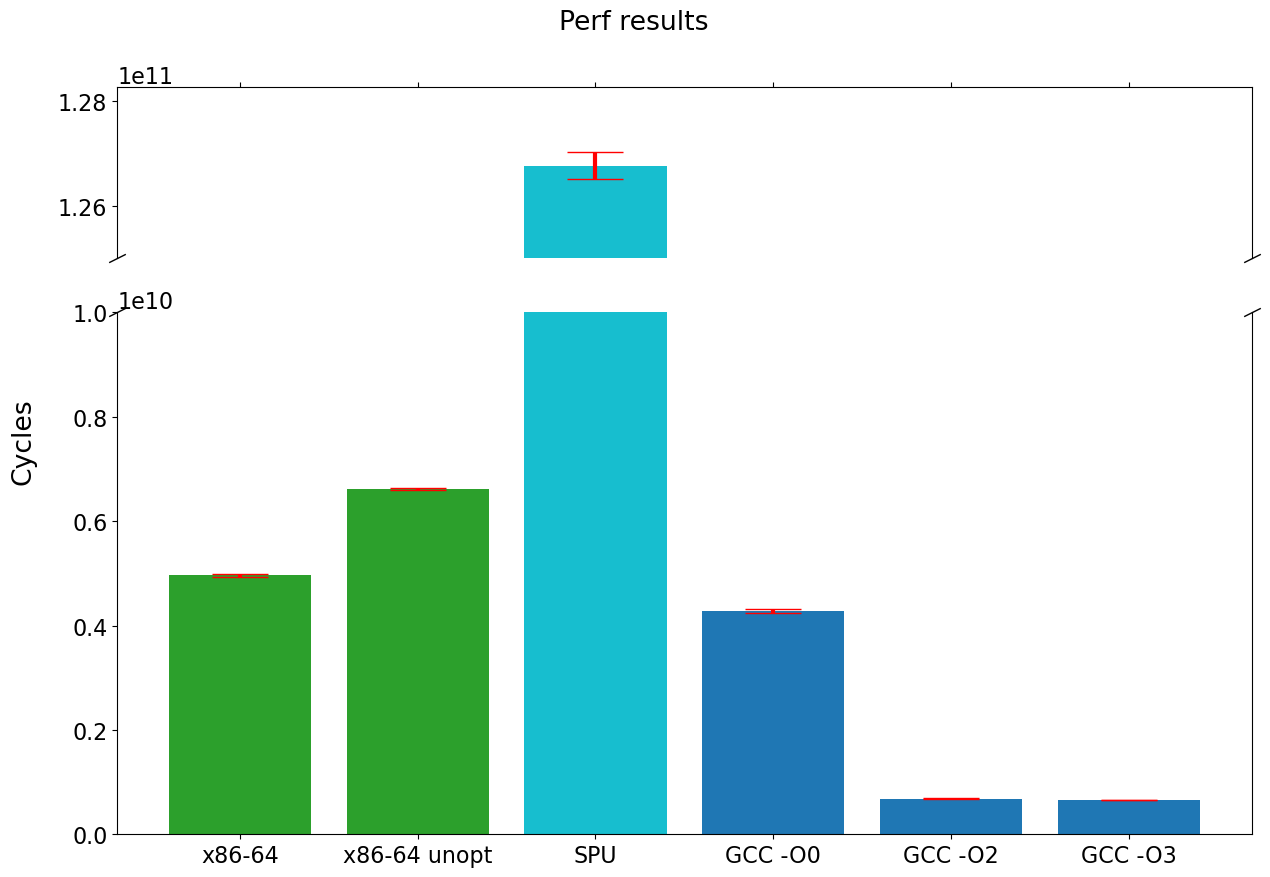

In [18]:
mpl.rcParams['font.size'] = 16

y = [y_.copy() for y_ in perf_results]
for i in range(len(y)):
    for j in range(len(y[i])):
        y[i][j] *= 1000_000

ybreak = [0.1 * 10**11, 1.25 * 10**11]
ymax = max([max(i) for i in y]) * 1.01

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, height_ratios=[ymax - ybreak[1], ybreak[0]])

fig.set_size_inches(13, 9)

colors = ["tab:green", "tab:green", "tab:cyan", "tab:blue", "tab:blue", "tab:blue"]

for i in range(len(y)):
    ax1.bar(names[i], np.average(y[i]), color = colors[i], yerr = np.std(y[i]), capsize=20, error_kw=dict(elinewidth=3), ecolor = "red")
    ax2.bar(names[i], np.average(y[i]), color = colors[i], yerr = np.std(y[i]), capsize=20, error_kw=dict(elinewidth=3), ecolor = "red")

ax1.set_ylim(ymin = ybreak[1], ymax = ymax)  # outliers only
ax2.set_ylim(ymin = 0, ymax = ybreak[0])  # most of the data

fig.subplots_adjust(hspace=0.15)  # adjust space between axes

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

fig.supylabel("Cycles")
fig.suptitle("Perf results", x = 0.5, horizontalalignment = 'center')


fig.tight_layout()

plt.savefig("../../img/perf_bar_chart_gen.png")
plt.show()